In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

In [80]:
df = pd.read_csv(r"walmart_dataset.csv")

## Analysing Basic Matrix

In [81]:
df.shape

(550068, 10)

In [82]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [83]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [84]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


### There are no null values in dataset

In [86]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [87]:
df.describe(include = object)

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [88]:
# converting some columns to categorical columns
cols = ['Product_Category','Occupation', 'Marital_Status' ]
df[cols] = df[cols].astype('object')

In [89]:
df.describe(include = object)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068
unique,3631,2,7,21,3,5,2,20
top,P00265242,M,26-35,4,B,1,0,5
freq,1880,414259,219587,72308,231173,193821,324731,150933


In [90]:
df.describe()

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


### we can see that purchase column contains some outliers

In [91]:
# Number of unique products in our dataset
df['Product_ID'].nunique()

3631

In [92]:
# Number of unique users in dataset
df['User_ID'].nunique()

5891

In [93]:
# Display distribution of values in categorical columns
categorical_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
df[categorical_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(df)

value
variable                   value          
Age                        0-17   0.027455
                           18-25  0.181178
                           26-35  0.399200
                           36-45  0.199999
                           46-50  0.083082
                           51-55  0.069993
                           55+    0.039093
City_Category              A      0.268549
                           B      0.420263
                           C      0.311189
Gender                     F      0.246895
                           M      0.753105
Marital_Status             0      0.590347
                           1      0.409653
Stay_In_Current_City_Years 0      0.135252
                           1      0.352358
                           2      0.185137
                           3      0.173224
                           4+     0.154028

### Observations :
- 75% of customers are male and 25% are female
- 60% customers are unmaried
- 43% of customers lives in B category city
- 40% of customer's age is in range 26-35

## Univariate Analysis

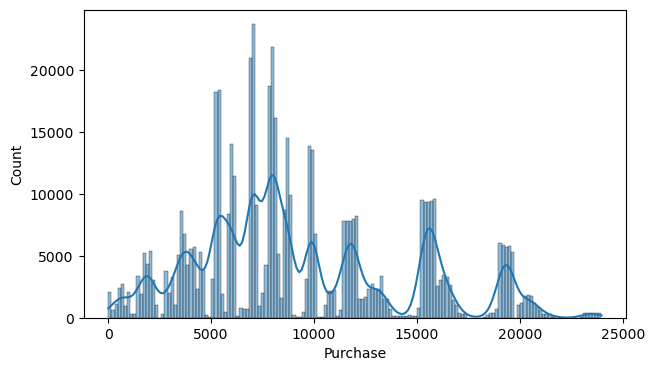

In [94]:
plt.figure(figsize=(7, 4))
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

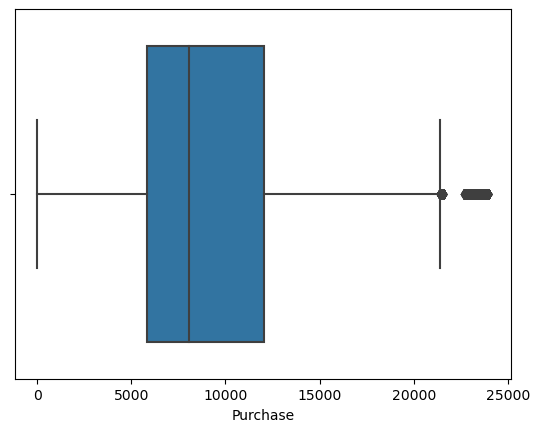

In [95]:
sns.boxplot(data=df, x='Purchase')
plt.show()

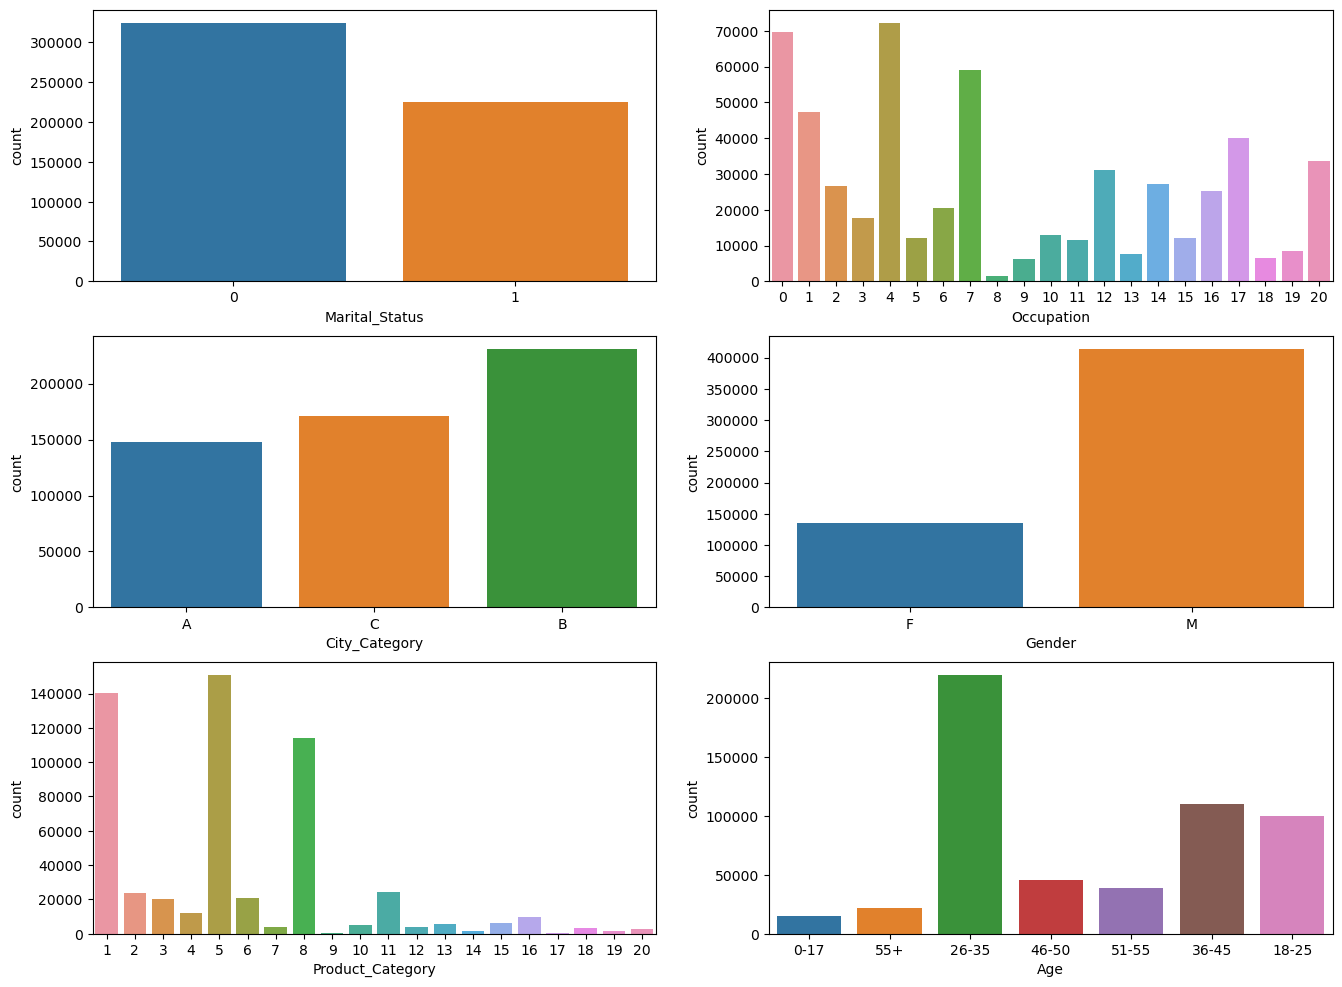

In [96]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
sns.countplot(data=df, x='Marital_Status', ax=axs[0,0])
sns.countplot(data=df, x='Occupation', ax=axs[0,1])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Gender', ax=axs[1,1])
sns.countplot(data=df, x='Product_Category',ax=axs[2,0])
sns.countplot(data=df, x='Age',ax=axs[2,1])
plt.show()

### Observations :
- 75% of customers are male and 25% are female
- 60% customers are unmaried
- 43% of customers lives in B category city
- 40% of customer's age is in range 26-35
- Product_category 1,5,8 are most purchases by customers

## Bi-variate Analysis

<Axes: xlabel='Product_Category', ylabel='Purchase'>

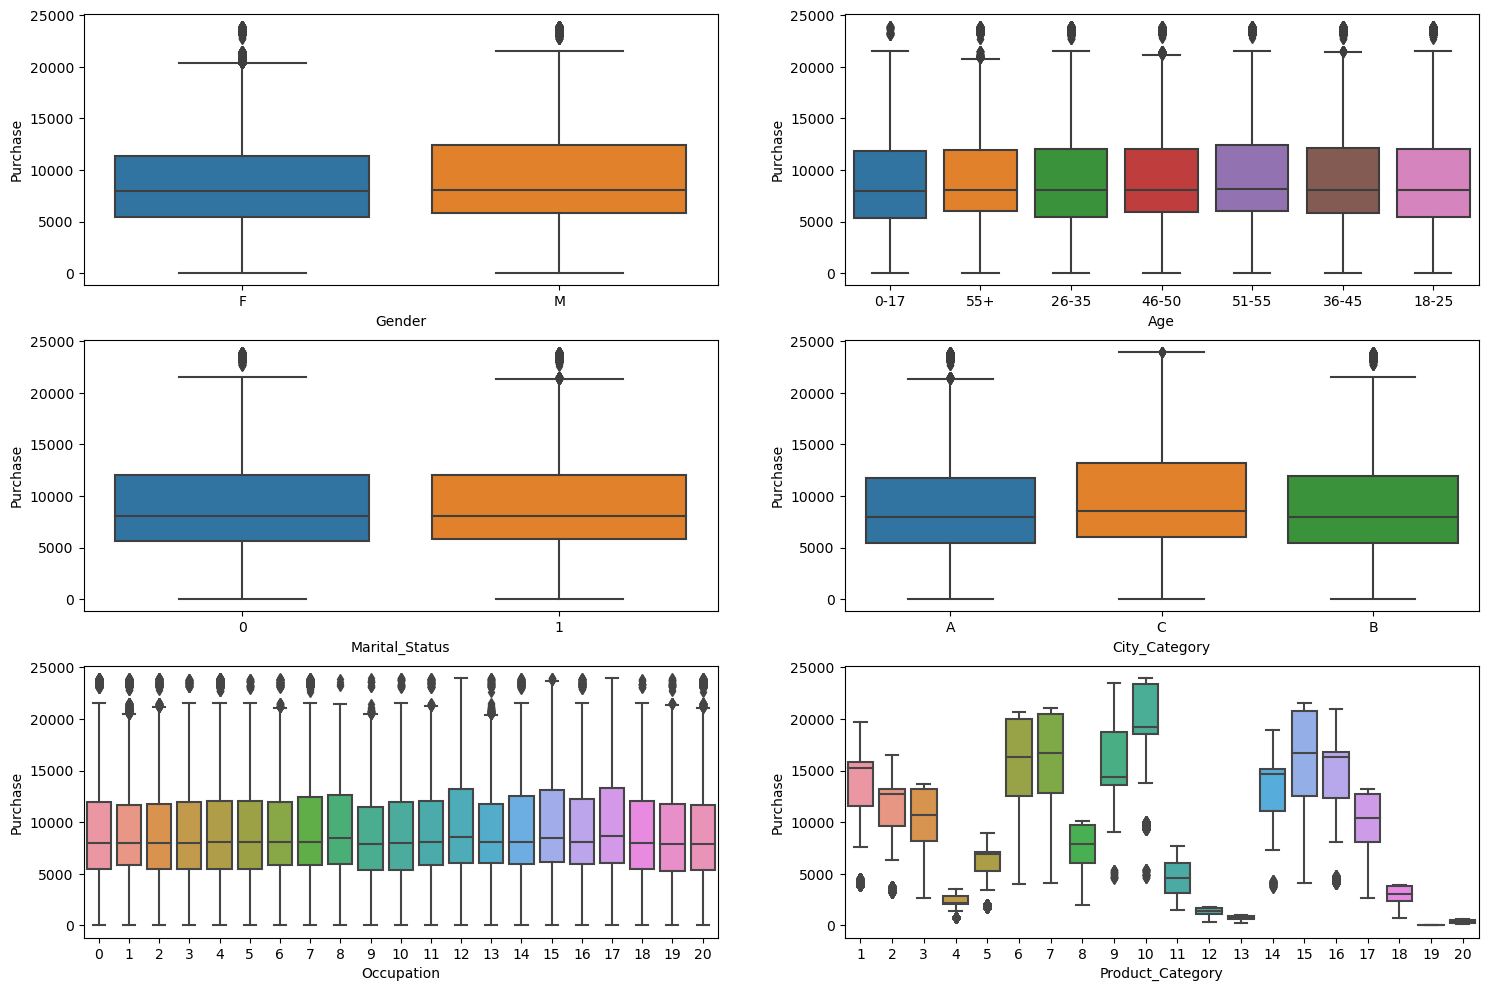

In [97]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
sns.boxplot(data=df, y='Purchase', x='Gender', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Age', ax=axs[0,1])
sns.boxplot(data=df, y='Purchase', x='Marital_Status', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='City_Category', ax=axs[1,1])
sns.boxplot(data=df, y='Purchase', x='Occupation', ax=axs[2,0])
sns.boxplot(data=df, y='Purchase', x='Product_Category', ax=axs[2,1])

### Average amount spend per customer for Male and Female

In [98]:
#Finding total amount spend by each customer
df_purchase_amt = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
df_purchase_amt = df_purchase_amt.reset_index()
df_purchase_amt

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [99]:
male_df = df_purchase_amt[df_purchase_amt['Gender']=='M']
female_df = df_purchase_amt[df_purchase_amt['Gender']=='F']
male_df.head(5)

,User_ID,Gender,Purchase
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
6,1000007,M,234668


In [100]:
print(df_purchase_amt['Gender'].value_counts())
male_avg = male_df['Purchase'].mean()
female_avg = female_df['Purchase'].mean()

print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))

M    4225
F    1666
Name: Gender, dtype: int64
Average amount spend by Male customers: 925344.40
Average amount spend by Female customers: 712024.39


### Observation
- Male customers spend more compare to female customers

In [101]:
genders = ["M", "F"]

male_sample_size = 2500
female_sample_size = 1000
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()
    
    male_means.append(male_mean)
    female_means.append(female_mean)

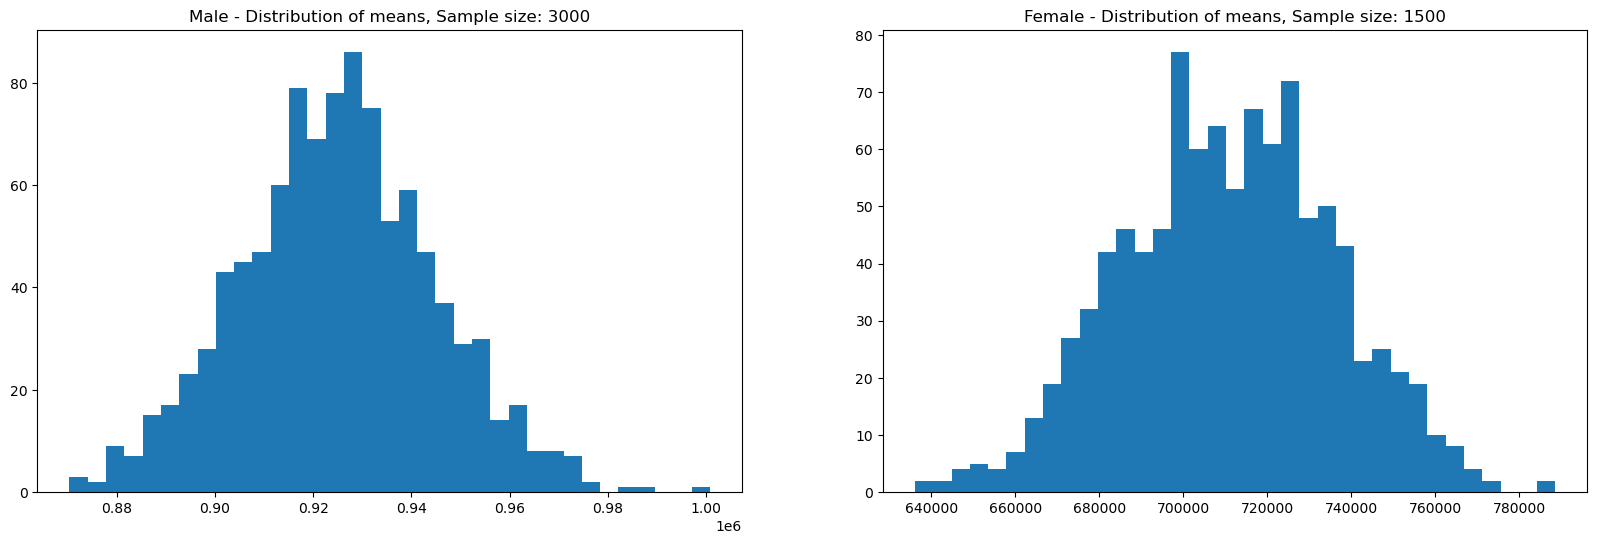

In [102]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].set_title("Female - Distribution of means, Sample size: 1500")

plt.show()

In [103]:
print("Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Population mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Population mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Mean of sample means of amount spend for Male: 925037.97
Mean of sample means of amount spend for Female: 710721.88

Male - Population mean: 925344.40 Sample std: 985830.10
Female - Population mean: 712024.39 Sample std: 807370.73


In [104]:
np.std(male_means)

19920.985875808798

In [105]:
male_df['Purchase'].std()/np.sqrt(2500)

19716.60201590776

In [106]:
np.std(female_means)

25236.287644085485

In [107]:
female_df['Purchase'].std()/np.sqrt(1000)

25531.304107668657

In [108]:
# margin_of_error = population mean / sqrt(sample size)
margin_of_error_male= male_df['Purchase'].std()/np.sqrt(2500)  # std-dev of sample mean distribution
margin_of_error_female= female_df['Purchase'].std()/np.sqrt(1000)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
print(z1)
print(z2)

-1.9599639845400545
1.959963984540054


In [109]:
left_boundry_male=np.mean(male_means)+z1*margin_of_error_male
right_boundry_male=np.mean(male_means)+z2*margin_of_error_male
left_boundry_female=np.mean(female_means)+z1*margin_of_error_female
right_boundry_female=np.mean(female_means)+z2*margin_of_error_female
print("Male confidence interval of means: ({:.2f}, {:.2f})".format(left_boundry_male, right_boundry_male))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(left_boundry_female, right_boundry_female))

Male confidence interval of means: (886394.14, 963681.80)
Female confidence interval of means: (660681.45, 760762.32)


### Now we can infer about the population that, 95% of the times:
1. Average amount spend by male customer will lie in between: (886263.41, 963551.07)
2. Average amount spend by female customer will lie in between: (663271.06, 763351.93)

## Average amount spent by married vs unmarried customers

In [110]:
df_purchase_amt = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
df_purchase_amt = df_purchase_amt.reset_index()
df_purchase_amt

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


0    3417
1    2474
Name: Marital_Status, dtype: int64


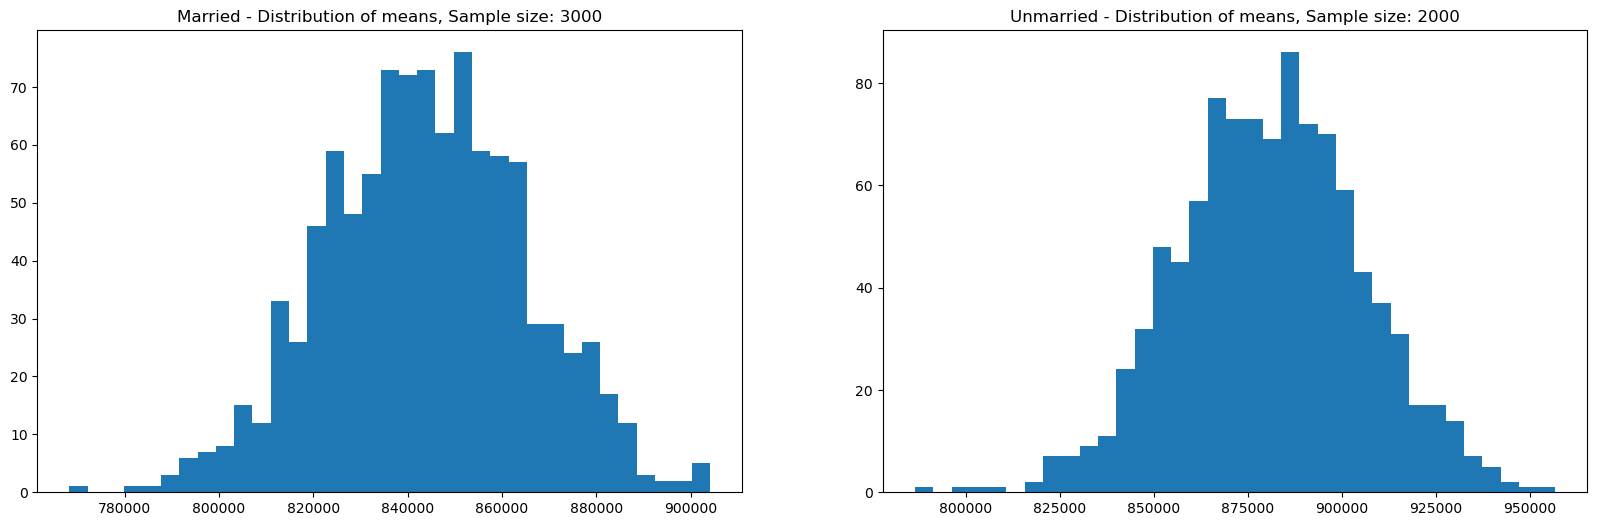

Mean of sample means of amount spend for Married: 843902.81
Mean of sample means of amount spend for Unmarried: 880845.97

Married - Population mean: 843526.80 Sample std: 935352.12
Unmarried - Population mean: 880575.78 Sample std: 949436.25


In [111]:
print(df_purchase_amt['Marital_Status'].value_counts())
marid_samp_size = 2000
unmarid_sample_size = 1500
num_repitions = 1000
marid_means = []
unmarid_means = []

for _ in range(num_repitions):
    marid_mean = df_purchase_amt[df_purchase_amt['Marital_Status']==1].sample(marid_samp_size, replace=True)['Purchase'].mean()
    unmarid_mean = df_purchase_amt[df_purchase_amt['Marital_Status']==0].sample(unmarid_sample_size, replace=True)['Purchase'].mean()
    
    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)
    
    
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")

plt.show()

print("Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))

print("\nMarried - Population mean: {:.2f} Sample std: {:.2f}".format(df_purchase_amt[df_purchase_amt['Marital_Status']==1]['Purchase'].mean(), df_purchase_amt[df_purchase_amt['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Population mean: {:.2f} Sample std: {:.2f}".format(df_purchase_amt[df_purchase_amt['Marital_Status']==0]['Purchase'].mean(), df_purchase_amt[df_purchase_amt['Marital_Status']==0]['Purchase'].std()))

In [112]:
margin_of_error_marid= df_purchase_amt[df_purchase_amt['Marital_Status']==1]['Purchase'].std()/np.sqrt(1500)  # std-dev of sample mean distribution
margin_of_error_unmarid= df_purchase_amt[df_purchase_amt['Marital_Status']==0]['Purchase'].std()/np.sqrt(1000)
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
print(z1)
print(z2)

-1.9599639845400545
1.959963984540054


In [113]:
left_boundry_marid=np.mean(marid_means)+z1*margin_of_error_marid
right_boundry_marid=np.mean(unmarid_means)+z2*margin_of_error_marid
left_boundry_unmarid=np.mean(unmarid_means)+z1*margin_of_error_unmarid
right_boundry_unmarid=np.mean(unmarid_means)+z2*margin_of_error_unmarid
print("marid confidence interval of means: ({:.2f}, {:.2f})".format(left_boundry_marid, right_boundry_marid))
print("unmarid confidence interval of means: ({:.2f}, {:.2f})".format(left_boundry_unmarid, right_boundry_unmarid))


marid confidence interval of means: (796568.33, 928180.45)
unmarid confidence interval of means: (822000.38, 939691.56)


### Now we can infer about the population that, 95% of the times:
1. Average amount spend by maried customer will lie in between: (796568.33, 928180.45)
2. Average amount spend by unmaried customer will lie in between: (822000.38, 939691.56)

## Finding Average amount spend for different age groups

In [114]:
df_purchase_amt = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
df_purchase_amt = df_purchase_amt.reset_index()
df_purchase_amt

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001
...,...,...,...
5886,1006036,26-35,4116058
5887,1006037,46-50,1119538
5888,1006038,55+,90034
5889,1006039,46-50,590319


In [115]:
df_purchase_amt['Age'].value_counts()
sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for age_interval in age_intervals:
    all_means[age_interval] = []

for age_interval in age_intervals:
    for _ in range(num_repitions):
        mean = df_purchase_amt[df_purchase_amt['Age']==age_interval].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[age_interval].append(mean)

In [116]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = df_purchase_amt[df_purchase_amt['Age']==val]
    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(200)
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> confidence interval of means: (846685.45, 1132633.19)
For age 36-45 --> confidence interval of means: (743625.61, 1015705.81)
For age 18-25 --> confidence interval of means: (731798.52, 977927.72)
For age 46-50 --> confidence interval of means: (663754.53, 921343.03)
For age 51-55 --> confidence interval of means: (653390.66, 873011.18)
For age 55+ --> confidence interval of means: (454119.04, 625275.45)
For age 0-17 --> confidence interval of means: (523646.63, 714089.00)


## Insights
- 75% of customers are male and 25% are female
- 60% customers are unmaried
- 43% of customers lives in B category city
- 40% of customer's age is in range 26-35
- Product_category 1,5,8 are most purchases by customers
- Male customers spend more compare to female 
- Maried and unmaried customers spends almost equally
- Customers with age in 26-35 spends highest amount followed by customers with age 36-45

## Suggestions :
- Male customer are more compare to female and they spend more also. So marketing team can focus on tp attract more female customers.
- Walmart can provide discounts to male customers on special days.
- Large amount of customer's age lies in 26-35 so walmart can focus on products related to this age group
- Most customers lives in B category cities so walmart can open more stores there